In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("MCR_HomeHlth.xlsx")
data.head()

,Provider_ID,Agency_Name,State,region,profit_b,TotalEpisNonLUPA,DistBenNonLUPA,AvgTotalVPENonLUPA,AvgSNVPENonLUPA,AvgPTVPENonLUPA,...,COPD,Depression,Diabetes,Hyperlipidemia,Hypertension,IHD,Osteoporosis,RAOA,Schizophrenia,Stroke
0,17008,JEFFERSON COUNTY HOME CARE,AL,4,0,235,100,10.6,6.8,2.9,...,0.22,0.35,0.53,0.45,NaN,0.38,0.07,0.50,0.23,0.11
1,17009,ALACARE HOME HEALTH & HOSPICE,AL,4,0,12012,6154,17.9,8.6,4.0,...,0.36,0.38,0.45,0.62,NaN,0.57,0.15,0.59,0.09,0.14
2,17013,GENTIVA HEALTH SERVICES,AL,4,0,809,459,20.5,8.0,6.3,...,0.35,0.30,0.47,0.64,NaN,0.51,0.17,0.68,0.09,0.11
3,17014,AMEDISYS HOME HEALTH OF BLOUNTSVILLE,AL,4,0,460,320,18.1,8.3,4.6,...,0.37,0.37,0.44,0.58,NaN,0.54,0.12,0.67,0.11,0.11
4,17016,SOUTHEAST ALABAMA HOMECARE,AL,4,0,959,500,14.0,8.4,3.4,...,0.37,0.28,0.51,0.61,NaN,0.55,0.11,0.59,0.08,0.11


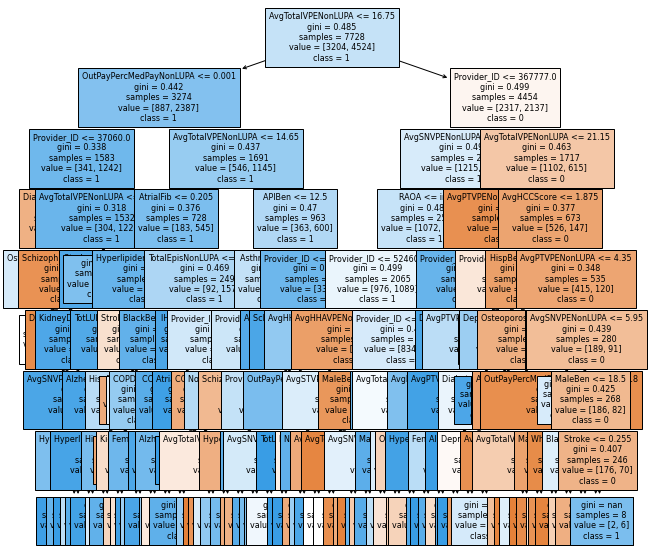

In [3]:
X = data.drop(columns=['Agency_Name', 'profit_b', 'State'])
y = data['profit_b']

# Split the dataset into training and validation sets (70%/30% split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 12345)

# Build a decision tree model
clf = DecisionTreeClassifier(max_depth = 8, criterion = 'gini', min_samples_leaf = 8, min_samples_split = 8)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 10))
plot_tree(clf, filled = True, feature_names = X.columns, class_names = ['0', '1'], fontsize = 8)  # Adjust class_names based on your target classes
plt.show()

In [4]:
# Make predictions on the validation set
y_pred = clf.predict(X_val)

# Evaluate the performance of the decision tree model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6562028373075762
Precision: 0.6918632643235436
Recall: 0.7422520661157025
F1-score: 0.7161724395713931
Confusion Matrix:
[[ 737  640]
 [ 499 1437]]


In [5]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_val, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.60      0.54      0.56      1377
           1       0.69      0.74      0.72      1936

    accuracy                           0.66      3313
   macro avg       0.64      0.64      0.64      3313
weighted avg       0.65      0.66      0.65      3313



In [6]:
# Making predictions on the validation set
y_pred_probs = clf.predict_proba(X_val)[:, -1]

In [8]:
# Sorting the dataset based on predicted probabilities for class 1 in descending order
sorted_indices = np.argsort(y_pred_probs)[::-1]  # Get the indices that would sort the array in descending order

# Use iloc to access elements by integer index
sorted_labels = y_val.iloc[sorted_indices]  # Sort the true labels based on the sorted indices

# Calculate cumulative numbers and response rates
cumulative_instances = np.arange(1, len(y_val) + 1)
cumulative_positive = np.cumsum(sorted_labels)  # Calculate the cumulative sum of positive instances
overall_response_rate = np.mean(y_val)
response_rates = cumulative_positive / cumulative_instances

# Calculate lift and gain metrics
lift = response_rates / overall_response_rate
gain = cumulative_positive / np.sum(y_val)

# Print lift and gain metrics
print("Lift:")
print(lift)
print("Gain:")
print(gain)

Lift:
1165    1.711260
2761    1.711260
2510    1.711260
9736    1.283445
2767    1.369008
          ...   
8495    1.000692
2112    1.000389
2184    1.000604
53      1.000302
7283    1.000000
Name: profit_b, Length: 3313, dtype: float64
Gain:
1165    0.000517
2761    0.001033
2510    0.001550
9736    0.001550
2767    0.002066
          ...   
8495    0.999483
2112    0.999483
2184    1.000000
53      1.000000
7283    1.000000
Name: profit_b, Length: 3313, dtype: float64


In [9]:
# Calculate the number of instances in each decile
decile_size = len(y_val) // 10  # Calculating the size of each decile


cumulative_positive_deciles = np.zeros(10)
cumulative_instances_deciles = np.zeros(10)

for i in range(10):
    start_index = i * decile_size
    end_index = (i + 1) * decile_size
    cumulative_positive_deciles[i] = np.sum(sorted_labels[start_index:end_index])
    cumulative_instances_deciles[i] = end_index - start_index

# Calculate response rates for each decile
response_rates_deciles = cumulative_positive_deciles / cumulative_instances_deciles

# Calculate overall response rate
overall_response_rate = np.mean(y_val)

# Calculate lift and gain metrics for each decile
lift_deciles = response_rates_deciles / overall_response_rate
gain_deciles = np.cumsum(cumulative_positive_deciles) / np.sum(y_val)

# Print lift and gain metrics for each decile
print("Decile\tLift\tGain")
for i in range(10):
    print(f"{i+1}\t{lift_deciles[i]}\t{gain_deciles[i]}")

Decile	Lift	Gain
1	1.4372518788544606	0.14359504132231404
2	1.4114020249182293	0.28460743801652894
3	1.3028326383860578	0.4147727272727273
4	1.2149431350028712	0.5361570247933884
5	0.8944049461936031	0.6255165289256198
6	0.9564445956405583	0.7210743801652892
7	0.7703256472996929	0.7980371900826446
8	0.7548157349379541	0.8734504132231405
9	0.7754956180869391	0.9509297520661157
10	0.48597725400114855	0.9994834710743802


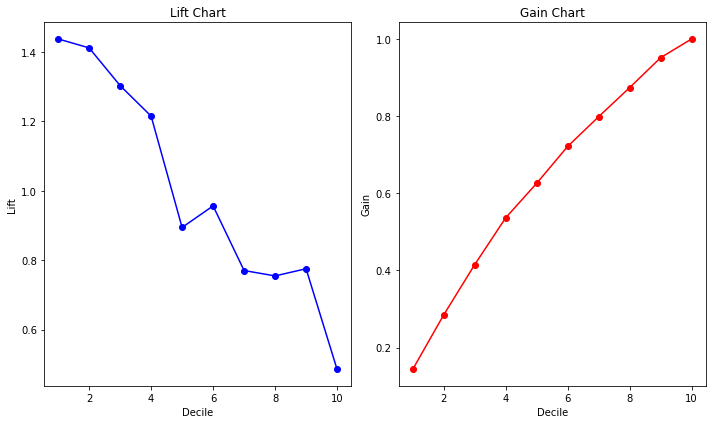

In [10]:
# Plot lift and gain chart
plt.figure(figsize=(10, 6))

# Lift chart
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, 11), lift_deciles, marker='o', color='b')
plt.title('Lift Chart')
plt.xlabel('Decile')
plt.ylabel('Lift')

# Gain chart
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 11), gain_deciles, marker='o', color='r')
plt.title('Gain Chart')
plt.xlabel('Decile')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.tree import _tree

# Extract decision rules from the decision tree
def extract_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth=0):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0)

# Extract decision rules from the decision tree model
extract_rules(clf, X.columns)

if AvgTotalVPENonLUPA <= 16.75
  if OutPayPercMedPayNonLUPA <= 0.00
    if Provider_ID <= 37060.00
      if Diabetes <= 0.45
        if Osteoporosis <= 0.15
          return [[5. 5.]]
        else:  # if Osteoporosis > 0.15
          return [[3. 5.]]
      else:  # if Diabetes > 0.45
        if Schizophrenia <= 0.11
          if Diabetes <= 0.49
            return [[6. 2.]]
          else:  # if Diabetes > 0.49
            return [[17.  0.]]
        else:  # if Schizophrenia > 0.11
          return [[6. 2.]]
    else:  # if Provider_ID > 37060.00
      if AvgTotalVPENonLUPA <= 13.15
        if Stroke <= 0.07
          if KidneyDis <= 0.16
            return [[3. 5.]]
          else:  # if KidneyDis > 0.16
            if AvgSNVPENonLUPA <= 8.95
              if RAOA <= 0.69
                return [[  3. 122.]]
              else:  # if RAOA > 0.69
                return [[ 3. 13.]]
            else:  # if AvgSNVPENonLUPA > 8.95
              if Hyperlipidemia <= 0.62
                ret

In [12]:
data.dtypes

Provider_ID                  int64
Agency_Name                 object
State                       object
region                       int64
profit_b                     int64
TotalEpisNonLUPA             int64
DistBenNonLUPA               int64
AvgTotalVPENonLUPA         float64
AvgSNVPENonLUPA            float64
AvgPTVPENonLUPA            float64
AvgOTVPENonLUPA            float64
AvgSTVPENonLUPA            float64
AvgHHAVPENonLUPA           float64
AVGMedSocVPENonLUPA        float64
OutPayPercMedPayNonLUPA    float64
TotLUPAEpis                float64
AvgAge                       int64
MaleBen                    float64
FemaleBen                  float64
NondualBen                 float64
DualBen                    float64
WhiteBen                   float64
BlackBen                   float64
APIBen                     float64
HispBen                    float64
AIANBen                    float64
OtherUnkBen                float64
AvgHCCScore                float64
AtrialFib           

In [15]:
pip install ydata_profiling

  Using cached ydata_profiling-4.6.4-py2.py3-none-any.whl (357 kB)
  Using cached numba-0.58.1-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached llvmlite-0.41.1-cp38-cp38-win_amd64.whl (28.1 MB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0



ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [18]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [19]:
import sweetviz as sv

In [20]:
report = sv.analyze(data)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
# Get feature importances from the decision tree
importances = clf.feature_importances_

# Create a dictionary to store feature importance along with feature names
feature_imp_dict = dict(zip(X.columns, importances))

# Sort the dictionary based on feature importance values
sorted_feature_imp_dict = dict(sorted(feature_imp_dict.items(), key=lambda item: item[1], reverse=True))

# Print the top 5 decision metrics with their impurity values
print("Top 5 Decision Metrics with Impurity Values:")
count = 0
for feature, impurity in sorted_feature_imp_dict.items():
    print(f"Metric: {feature}, Impurity: {impurity}")
    count += 1
    if count == 5:
        break

Top 5 Decision Metrics with Impurity Values:
Metric: Provider_ID, Impurity: nan
Metric: AvgTotalVPENonLUPA, Impurity: nan
Metric: AvgPTVPENonLUPA, Impurity: nan
Metric: OutPayPercMedPayNonLUPA, Impurity: 0.023164215076803097
Metric: AvgSNVPENonLUPA, Impurity: 0.012414850546535815


In [28]:
# Feature importance
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending = False)

# Displaying the features and importance
print(importance_df.head())

                    Feature  Importance
11  OutPayPercMedPayNonLUPA    0.023164
5           AvgSNVPENonLUPA    0.012415
38                     RAOA    0.008772
19                 BlackBen    0.003289
24              AvgHCCScore    0.003110
